<a href="https://colab.research.google.com/github/Danjstr/DAV-6150/blob/main/Daniel_Strauss_M2_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

This assignment is meant to prove our ability to use cross-validation. As such, We will be building two simple cross-validated linear models using power plant data provided by UC Irvine machine learning archive.

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant#





**Attribute Information:**

Features consist of hourly average ambient variables
Temperature (T) in the range 1.81°C and 37.11°C,
Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
Relative Humidity (RH) in the range 25.56% to 100.16%
Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
Net hourly electrical energy output (EP) 420.26-495.76 MW The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.



In [ ]:
# import dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
#Read data From Github
df7 = pd.read_csv('https://raw.githubusercontent.com/Danjstr/DAV-6150/main/M2_Data.csv')
df7.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## **Exploratory Data Analysis**

In [ ]:
#Show The Data
df7

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
#Show the tail of the data
df7.tail()

,T,V,AP,RH,EP
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [ ]:
#Show the description
df7.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
#Show the info
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   EP      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
#Show the shape
df7.shape

(9568, 5)

In [ ]:
df2=df7

In [ ]:
#Show the columns
df2.columns

Index(['T', 'V', 'AP', 'RH', 'EP'], dtype='object')

In [ ]:
#Show the data type
df2.dtypes

T     float64
V     float64
AP    float64
RH    float64
EP    float64
dtype: object

In [ ]:
df3=df2

Text(0.5, 1.0, 'Temperature')

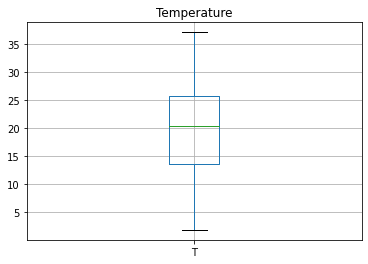

In [ ]:
#Show Temperature distribution
import matplotlib.pyplot as plt
import seaborn as sns

df3.boxplot(column=['T'], return_type='axes');
plt.title("Temperature")



Text(0.5, 1.0, 'Temperature')

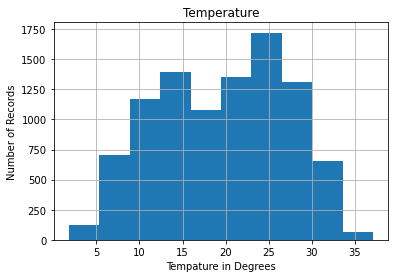

In [ ]:
#Show Temperature distribution
df3.hist(column=['T']);
plt.xlabel("Tempature in Degrees") # Add ", fontsize = #" to control fontsize
plt.ylabel("Number of Records")
plt.title("Temperature")

Text(0.5, 1.0, 'Net Hourly Energy Output')

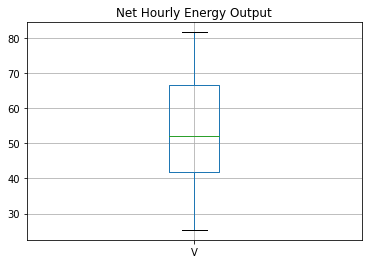

In [ ]:
#Show Energey Output
df3.boxplot(column=['V'], return_type='axes');
plt.title("Net Hourly Energy Output")



Text(0.5, 1.0, 'Net Hourly Energy Output')

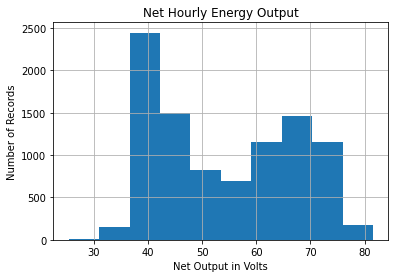

In [ ]:
#Show Energey Output
df3.hist(column=['V']);
plt.xlabel("Net Output in Volts") # Add ", fontsize = #" to control fontsize
plt.ylabel("Number of Records")
plt.title("Net Hourly Energy Output")

Text(0.5, 1.0, 'Ambient Preasure')

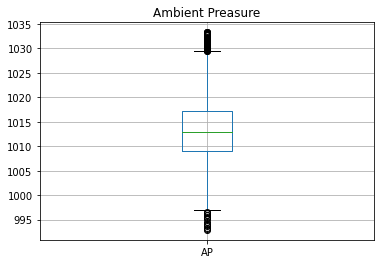

In [ ]:
#Show Ambient Preasure
df3.boxplot(column=['AP'], return_type='axes');
plt.title("Ambient Preasure")



Text(0.5, 1.0, 'Ambient Preasure')

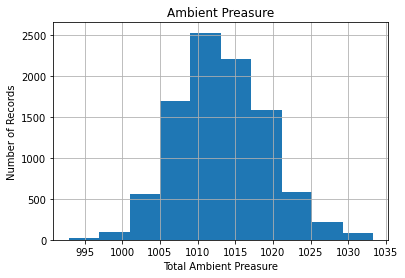

In [ ]:
#Show Ambient Preasure
df3.hist(column=['AP']);
plt.xlabel("Total Ambient Preasure") # Add ", fontsize = #" to control fontsize
plt.ylabel("Number of Records")
plt.title("Ambient Preasure")

Text(0.5, 1.0, 'Relative Humidity')

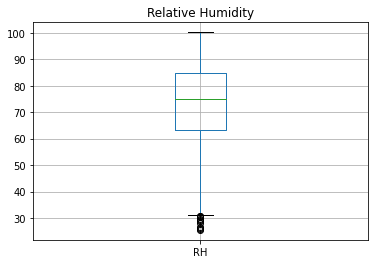

In [ ]:
#Show Humidity
df3.boxplot(column=['RH'], return_type='axes');
plt.title("Relative Humidity")



Text(0.5, 1.0, 'Relative Humidity')

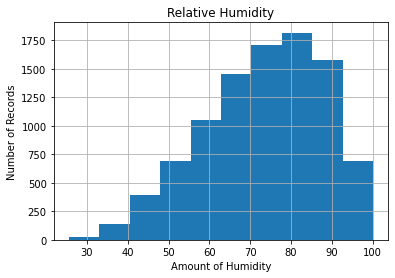

In [ ]:
#Show Humidity
df3.hist(column=['RH']);
plt.xlabel("Amount of Humidity") # Add ", fontsize = #" to control fontsize
plt.ylabel("Number of Records")
plt.title("Relative Humidity")

Text(0.5, 1.0, 'Exaust Vacuum')

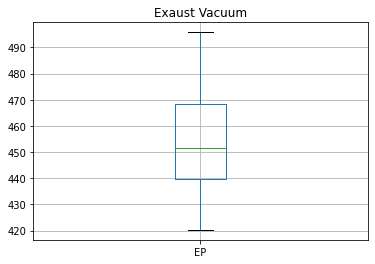

In [ ]:
#Show Exaust Vacuum
df3.boxplot(column=['EP'], return_type='axes');
plt.title("Exaust Vacuum")



Text(0.5, 1.0, 'Exaust Vacuum')

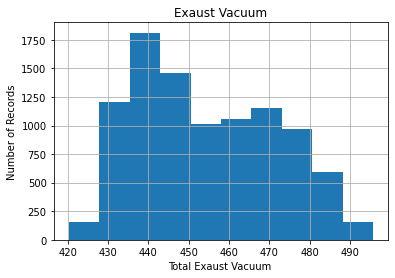

In [ ]:
#Show Exaust Vacuum
df3.hist(column=['EP']);
plt.xlabel("Total Exaust Vacuum ") # Add ", fontsize = #" to control fontsize
plt.ylabel("Number of Records")
plt.title("Exaust Vacuum")

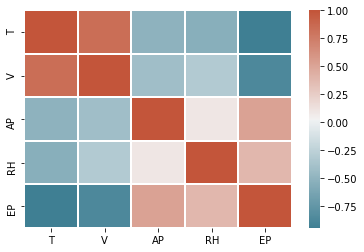

In [ ]:
from matplotlib import rcParams

# plot the heatmap
corr = df3.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))
rcParams["figure.figsize"] =10, 10

## **Linear Models With Cross Validation**

When selecting exploratory variables it is best to use variables that are highly correlated with one another during a linear regression. We are using 'V' as our response variable.

As such selecting two highly correlated exploratory variables is difficult. 

For the first model, we used Temperature and Ambient Pressure.
For the second model, we used Temperature and Ambient Pressure and exhaust vacuum.

In [ ]:
# copy original df
X = df3.copy()


In [ ]:
X1 = df3.copy()

In [ ]:
# drop response variable
X.drop('V', axis=1, inplace=True)


In [ ]:
X.head()

,T,AP,RH,EP
0,14.96,1024.07,73.17,463.26
1,25.18,1020.04,59.08,444.37
2,5.11,1012.16,92.14,488.56
3,20.86,1010.24,76.64,446.48
4,10.82,1009.23,96.62,473.90


In [ ]:
# Set Response variable Energy Output as Y
y = df3[['V']]

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [ ]:
# Time and Ambient Preasure are explanatory varaibles
X_train = X_train[['T', 'AP']]
X_test = X_test[['T', 'AP']]

# Fit Model
model = LinearRegression().fit(X_train,y_train)


In [ ]:
# predict
y_pred = model.predict(X_test)
print(y_pred)

[[54.32795338]
 [37.50924227]
 [64.17907906]
 ...
 [39.42956638]
 [40.90190675]
 [70.06212436]]


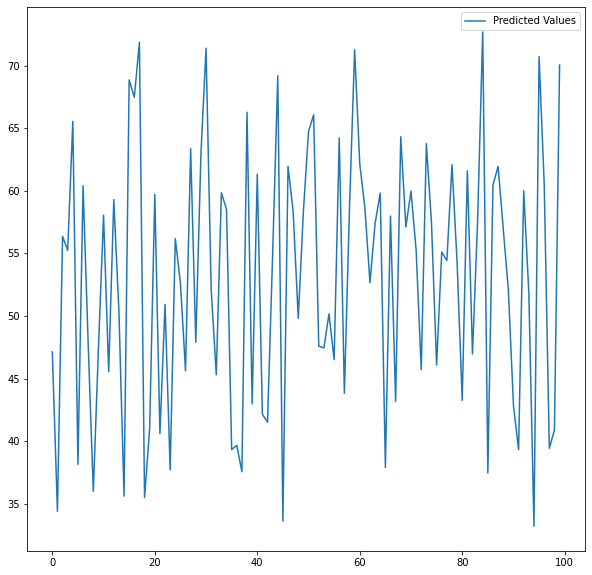

In [ ]:
rcParams["figure.figsize"] =10, 10
plt.plot(y_pred[-100:], label="Predicted Values")

plt.legend()
plt.show()

In [ ]:
model = LinearRegression()

#cross validation score for 10 folds.
scores = cross_val_score(model, X_train, y_train, cv=10)
print(scores)

[0.69124793 0.69295499 0.7138174  0.71829061 0.71573825 0.72870615
 0.72184119 0.71910052 0.72030495 0.6898889 ]


In [ ]:
#Find the mean of our ten folds
np.mean(scores)

0.7111890898796901

In [ ]:
# Train Test Split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=17)

In [ ]:
# Time and Ambient Preasure and Exhaust Vacuum are explanatory varaibles
X1_train = X1_train[['T', 'EP', 'AP']]
X1_test = X1_test[['T', 'EP', 'AP']]

model = LinearRegression().fit(X1_train,y_train)


In [ ]:
# predict
y_pred = model.predict(X1_test)

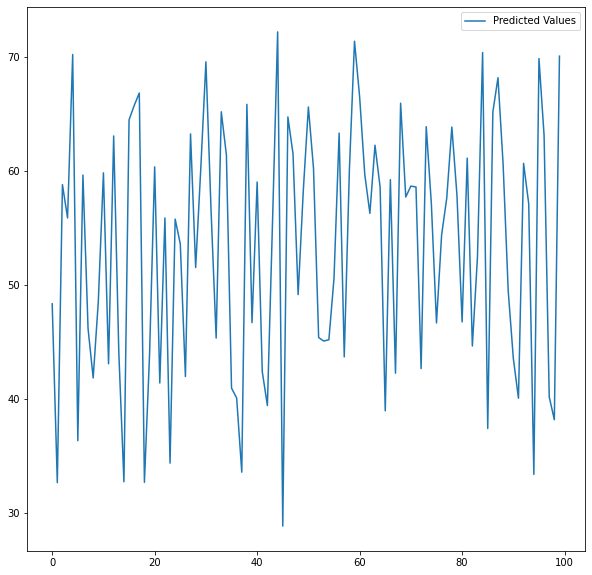

In [ ]:
rcParams["figure.figsize"] =10, 10
plt.plot(y_pred[-100:], label="Predicted Values")

plt.legend()
plt.show()

In [ ]:
model = LinearRegression()

#cross validation score for 10 folds.
scores = cross_val_score(model, X1_train, y_train, cv=10)
print(scores)

[0.75676134 0.75388285 0.76180116 0.76771404 0.76258786 0.76358062
 0.7662708  0.75932461 0.77232981 0.75071063]


In [ ]:
#Find the mean of our ten folds
np.mean(scores)

0.7614963716329269

In the end, we see that our second k-fold cross-validation was superior offering us a value of 0.76 instead of 0.71. This makes our second Model Superior. This is likely a result of Time and Ambient pressure not being greatly correlated in our first model. If temperature and Energy output were used as response variables we would likely have yielded better results for the model overall as they are much better correlated.